### 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

In [1]:
import sklearn
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [2]:
# load dataset

diabetes = load_diabetes()

df_X, df_y = diabetes.data, diabetes.target

print(df_X.shape)
print(df_y.shape)

(442, 10)
(442,)


In [3]:
# check the dataset by converting into pandas dataframe
df_diabetes = pd.DataFrame(df_X, columns=diabetes.feature_names)
df_diabetes['target'] = pd.Series(diabetes.target)
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [4]:
# convert dataset into numpy array
X, y = np.array(df_X), np.array(df_y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
n_samples, n_features = X_train.shape[0], X_train.shape[1]

(353, 10) (89, 10) (353,) (89,)


In [5]:
# initialize parameters
W = np.random.rand(n_features)
b = np.random.rand(1)
print(W.shape, b.shape)

(10,) (1,)


In [6]:
# define linear regression model
def linear_regression(X, W, b):
    y_pred = np.dot(X, W) + b
    return y_pred

In [7]:
# define loss function (MSE)
def mean_squared_error(y_pred, y_true):
    loss = ((y_pred - y_true)**2).mean()
    return loss

def loss(X, W, b, y_true):
    y_pred = linear_regression(X, W, b)
    loss = mean_squared_error(y_pred, y_true)
    return loss

In [8]:
# define gradient descent
def gradient(X, W, b, y):
    N = len(y)
    y_pred = linear_regression(X, W, b)
    dW = 2/N * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

Iteration 100 : Loss 4004.99
Iteration 200 : Loss 3442.25
Iteration 300 : Loss 3214.09
Iteration 400 : Loss 3093.64
Iteration 500 : Loss 3022.57
Iteration 600 : Loss 2978.78
Iteration 700 : Loss 2951.22
Iteration 800 : Loss 2933.60
Iteration 900 : Loss 2922.16
Iteration 1000 : Loss 2914.62
Iteration 1100 : Loss 2909.57
Iteration 1200 : Loss 2906.13
Iteration 1300 : Loss 2903.74
Iteration 1400 : Loss 2902.05
Iteration 1500 : Loss 2900.84
Iteration 1600 : Loss 2899.94
Iteration 1700 : Loss 2899.26
Iteration 1800 : Loss 2898.74
Iteration 1900 : Loss 2898.33
Iteration 2000 : Loss 2897.99
Iteration 2100 : Loss 2897.72
Iteration 2200 : Loss 2897.48
Iteration 2300 : Loss 2897.27
Iteration 2400 : Loss 2897.08
Iteration 2500 : Loss 2896.92
Iteration 2600 : Loss 2896.76
Iteration 2700 : Loss 2896.61
Iteration 2800 : Loss 2896.47
Iteration 2900 : Loss 2896.34
Iteration 3000 : Loss 2896.21
Iteration 3100 : Loss 2896.09
Iteration 3200 : Loss 2895.96
Iteration 3300 : Loss 2895.84
Iteration 3400 : Lo

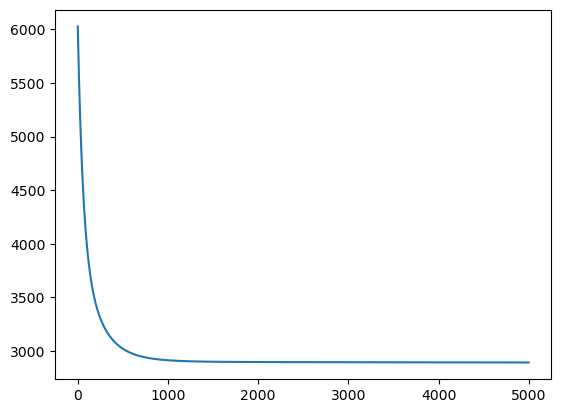

In [9]:
losses = []
LEARNING_RATE = 0.5

for i in range(1, 5001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.2f' % (i, L))

plt.plot(losses)
plt.show()

In [10]:
# evaluate the model
y_pred = linear_regression(X_test, W, b)
mse = mean_squared_error(y_pred, y_test)
print('Mean Squared Error on Test Data :', mse)

Mean Squared Error on Test Data : 2885.282558290309


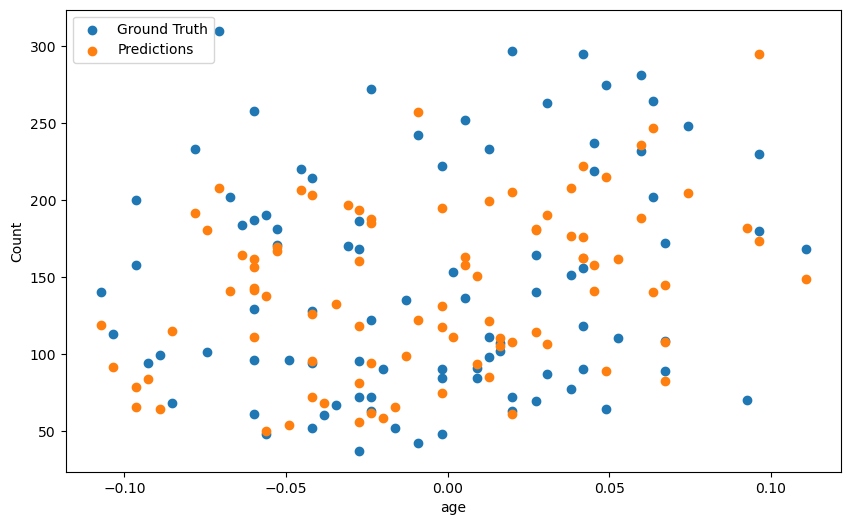

In [11]:
# plot the predicted values with humidity
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, label='Ground Truth')
plt.scatter(X_test[:, 0], y_pred, label='Predictions')
plt.xlabel('age')
plt.ylabel('Count')
plt.legend()
plt.show()